In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [8]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

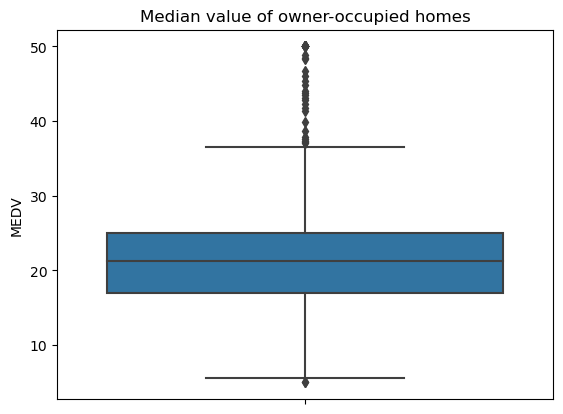

In [6]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Median value of owner-occupied homes')

Text(0.5, 1.0, 'Charles River variable')

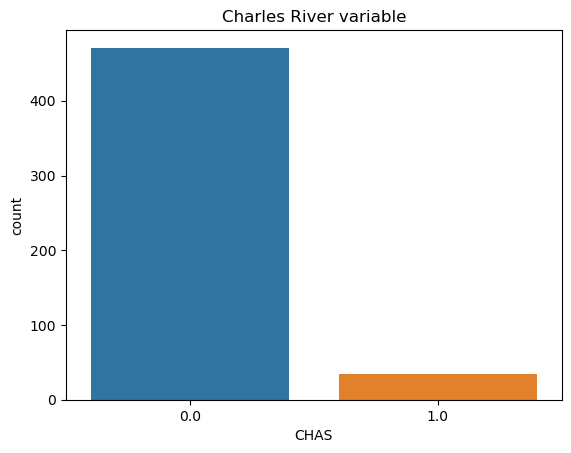

In [15]:
ax = sns.countplot(data = boston_df, x = 'CHAS')
ax.set_title("Charles River variable")

In [31]:
boston_df.loc[(boston_df['AGE']<=35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70), 'age_group'] = '70 years and older'



Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

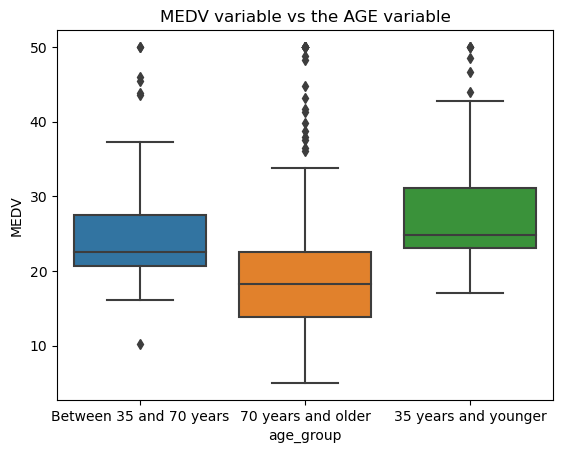

In [35]:
ax = sns.boxplot(data = boston_df, x = 'age_group', y = 'MEDV')
ax.set_title('MEDV variable vs the AGE variable')

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

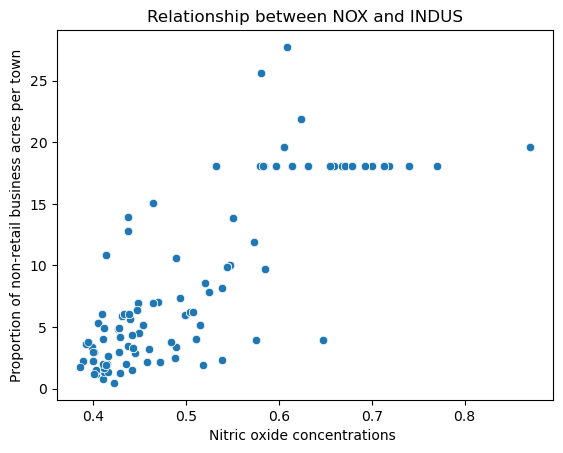

In [41]:
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel("Nitric oxide concentrations ")
plt.ylabel("Proportion of non-retail business acres per town")
ax.set_title("Relationship between NOX and INDUS")

From the above scatterplot we can say that the Proportion of non-retail business acres per town follows a positive sloping relationship w.r.t Nitric oxide concentrations. When the Nitric oxide concentrations goes past 0.6, the Proportion of non-retail business acres per town stays stagnant.


Text(0.5, 1.0, 'Pupil to teacher ratio Histogram')

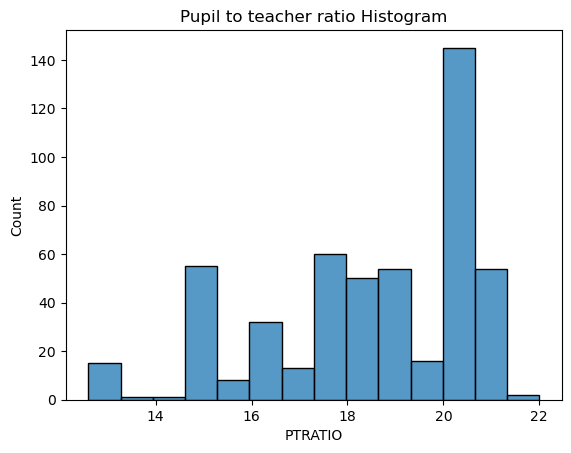

In [44]:
ax = sns.histplot(boston_df.PTRATIO)
ax.set_title("Pupil to teacher ratio Histogram")

In [45]:
import scipy.stats

Stating Hypothesis:

H0 (Null Hypothesis) = There is no significant difference in median value of houses bounded by the Charles river

Ha (Alternate Hypothesis) = There is significant difference in median value of houses bounded by the Charles river

Taking alpha value = 0.05

In [46]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

As pvalue is less than 0.05 thus we fail to reject the null hypothesis and conclude that there is no significant difference in median value of houses bounded by the Charles river

Stating Hypothesis:

H0 (Null Hypothesis) = There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Ha (Alternate Hypothesis) = There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Taking alpha value = 0.05

In [56]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years'] ['MEDV']
seventy_and_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [61]:
f_statistic,p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_and_older)
print("F_Statistic: {},P_Value: {}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599,P_Value: 1.7105011022702984e-15


As p_value is less than 0.05, we reject the null hypothesis that there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax.set_title("Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Stating Hypothesis:

H0 (Null Hypothesis) = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Ha (Alternate Hypothesis) = There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Taking alpha value = 0.05

In [67]:
correlation_coefficient,p_value = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print("correlation_coefficient: {},p_value: {}".format(correlation_coefficient,p_value))

correlation_coefficient: 0.7636514469209151,p_value: 7.913361061238693e-98


In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

As p_value is less than 0.05, we reject the null hypothesis that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [72]:
X = boston_df["DIS"]
Y = boston_df["MEDV"]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        16:02:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.